<a href="https://colab.research.google.com/github/RithwikMohan/ML_Lab/blob/main/Houseprice_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries and functions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading a dataset

In [ ]:
filepath2 = '/content/drive/MyDrive/Datasets/house_price_train.csv'
df2 = pd.read_csv(filepath2)
print(df2.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0] #checking for null values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Constant Features (columns with constant values)

In [ ]:
# Select only numeric columns
numeric_cols = x_train2.select_dtypes(include=['number']).columns

# Find constant numeric features (std = 0)
constant_features2 = [col for col in numeric_cols if x_train2[col].std() == 0]

print(len(constant_features2))


0


In [ ]:
x_train2.drop(labels = constant_features2 , axis=1 , inplace = True)
x_test2.drop(labels = constant_features2 , axis=1 , inplace = True)

Quasi Constant Features (98% of the values of a column are same or constant)

In [ ]:
quasi_constant_feature = []

for feature in x_train2.columns:
  predominant = (x_train2[feature].value_counts() / np.float64(len(x_train2))).sort_values(ascending=False).values[0]

  if predominant > 0.999:
    quasi_constant_feature.append(feature)

print(len(quasi_constant_feature))

1


In [ ]:
x_train2.drop(labels = quasi_constant_feature , axis=1 , inplace = True)
x_test2.drop(labels = quasi_constant_feature , axis=1 , inplace = True)

Duplicated Columns (Two or More Cols having same duplicated values)

In [ ]:
duplicated_feat = []

for i in range(0,len(x_train2.columns)):
  col_1 = x_train2.columns[i]
  for col_2 in x_train2.columns[i+1:]:
    if x_train2[col_1].equals(x_train2[col_2]):
      duplicated_feat.append(col_2)

print(duplicated_feat)

[]


In [ ]:
duplicated_features = list(set(duplicated_feat))
x_train2.drop(labels = duplicated_features , axis=1 , inplace = True)
x_test2.drop(labels = duplicated_features , axis=1 , inplace = True)

Corelation Heat Map

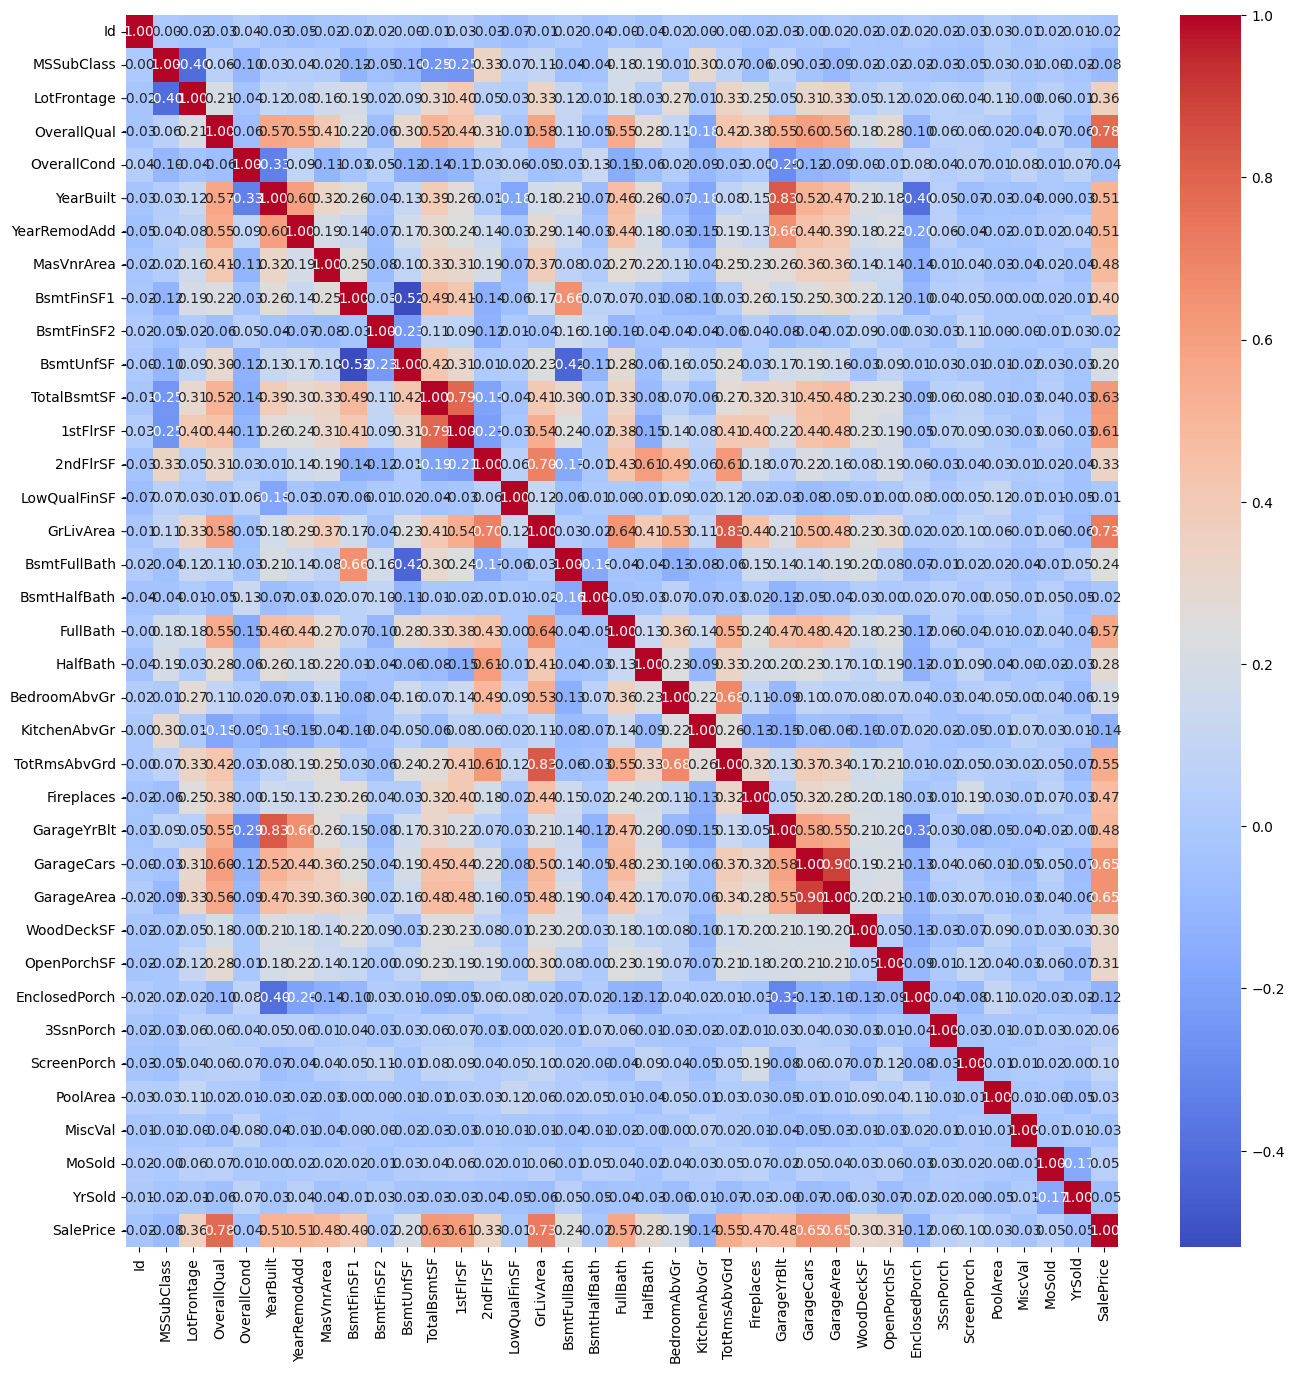

In [ ]:
numeric_cols = x_train2.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [ ]:
# Select only numeric columns to avoid errors during corr()
x_train_numeric = x_train2.select_dtypes(include=['number'])

# Your correlation function
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Find correlated features with correlation > 0.9
corr_features = correlation(x_train_numeric, 0.9)
correlated_features = list(set(corr_features))

# Print the results
print(f"Number of highly correlated features: {len(correlated_features)}")
print("List of correlated features:")
print(correlated_features)


Number of highly correlated features: 0
List of correlated features:
[]


In [ ]:
x_train2.drop(labels = correlated_features , axis=1 , inplace = True)
x_test2.drop(labels = correlated_features , axis=1 , inplace = True)

Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing target values
df_clean = df2.dropna(subset=['LotFrontage'])

# Separate features and target
X = df_clean.drop(columns=['LotFrontage']).copy()
Y = df_clean['LotFrontage']

# Encode categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Fill missing values in features
X = X.fillna(0)  # or X.fillna(X.mean())

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, Y, random_state=42)

# Create DataFrame and sort
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info Score': mi_scores})
mi_df = mi_df.sort_values('Mutual Info Score', ascending=False)

print(mi_df)


         Feature  Mutual Info Score
3        LotArea           0.940957
11  Neighborhood           0.592056
18     YearBuilt           0.443443
1     MSSubClass           0.440066
58   GarageYrBlt           0.329426
..           ...                ...
21      RoofMatl           0.000000
46  BsmtFullBath           0.000000
44  LowQualFinSF           0.000000
51  KitchenAbvGr           0.000000
54    Functional           0.000000

[80 rows x 2 columns]


Chi Square Test to select useful features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import pandas as pd

# Drop rows where target is NaN
df_clean = df2.dropna(subset=['LotFrontage'])

# Separate features and target
X = df_clean.drop(columns=['LotFrontage']).copy()
Y = df_clean['LotFrontage']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Replace negative values with 0 (required by chi2)
X = X.clip(lower=0)

# Handle missing values in features (fill NaNs with 0)
X = X.fillna(0)

# If target is categorical (object), encode it (not necessary if numeric)
if Y.dtype == 'object':
    Y = LabelEncoder().fit_transform(Y.astype(str))

# Run chi2
chi_score, p_values = chi2(X, Y)

# Create DataFrame of scores
chi_df = pd.DataFrame({'Feature': X.columns, 'Chi Square Score': chi_score, 'P Value': p_values})

# Sort by score descending
chi_df = chi_df.sort_values('Chi Square Score', ascending=False)

# Add decision column based on p-value threshold
chi_df['Decision'] = chi_df['P Value'].apply(lambda p: 'Reject Null Hypothesis' if p < 0.05 else 'Accept Null Hypothesis')

print(chi_df)


        Feature  Chi Square Score  P Value                Decision
79    SalePrice      1.741230e+07      0.0  Reject Null Hypothesis
3       LotArea      5.605937e+06      0.0  Reject Null Hypothesis
70     PoolArea      2.176204e+05      0.0  Reject Null Hypothesis
33   BsmtFinSF1      1.369288e+05      0.0  Reject Null Hypothesis
25   MasVnrArea      1.012165e+05      0.0  Reject Null Hypothesis
..          ...               ...      ...                     ...
13   Condition2      3.362180e+00      1.0  Accept Null Hypothesis
73  MiscFeature      2.234938e+00      1.0  Accept Null Hypothesis
4        Street      5.418408e-01      1.0  Accept Null Hypothesis
76       YrSold      1.214877e-01      1.0  Accept Null Hypothesis
8     Utilities               NaN      NaN  Accept Null Hypothesis

[80 rows x 4 columns]


ANOVA

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd

# Drop rows where target is NaN
df_clean = df2.dropna(subset=['LotFrontage'])

# Separate features and target
X = df_clean.drop(columns=['LotFrontage'])
y = df_clean['LotFrontage']

# Encode target if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# Select only numeric features
X_num = X.select_dtypes(include=['number']).copy()

# Fill NaNs in numeric features with mean or 0 (you can choose)
X_num = X_num.fillna(X_num.mean())

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_num, y)

# Create DataFrame with results
f_df = pd.DataFrame({'Feature': X_num.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort by F-Score descending
f_df = f_df.sort_values('F-Score', ascending=False)

print(f_df)


          Feature    F-Score        P-Value
2         LotArea  28.539379  4.230729e-250
1      MSSubClass   7.712141   2.737932e-78
12       1stFlrSF   6.354599   4.844824e-62
36      SalePrice   6.062250   1.924845e-58
5       YearBuilt   5.417290   2.166745e-50
32       PoolArea   4.905191   6.620293e-44
11    TotalBsmtSF   4.787279   2.103884e-42
15      GrLivArea   4.675573   5.603680e-41
26     GarageArea   4.416458   1.152752e-37
25     GarageCars   4.361193   5.877891e-37
3     OverallQual   4.099739   1.310324e-33
7      MasVnrArea   3.392521   1.332556e-24
22   TotRmsAbvGrd   3.207598   2.798772e-22
24    GarageYrBlt   3.134211   2.301743e-21
18       FullBath   2.970573   2.432394e-19
8      BsmtFinSF1   2.918739   1.051189e-18
6    YearRemodAdd   2.679682   8.147875e-16
23     Fireplaces   2.402965   1.390501e-12
20   BedroomAbvGr   2.347097   5.984255e-12
28    OpenPorchSF   2.256913   6.085521e-11
10      BsmtUnfSF   2.107200   2.554041e-09
27     WoodDeckSF   2.057193   8

In [ ]:
# Filter features with p-value less than 0.05 (significant features)
significant_features = f_df[f_df['P-Value'] < 0.05]['Feature'].tolist()

print(f"Selected features based on p-value < 0.05: {significant_features}")

# Now keep only these features in your X_num
X_num_filtered = X_num[significant_features]

# If you want, you can also filter the original dataframe like this:
X_filtered = X[significant_features]

# Your target y remains the same


Selected features based on p-value < 0.05: ['LotArea', 'MSSubClass', '1stFlrSF', 'SalePrice', 'YearBuilt', 'PoolArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'GarageCars', 'OverallQual', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'FullBath', 'BsmtFinSF1', 'YearRemodAdd', 'Fireplaces', 'BedroomAbvGr', 'OpenPorchSF', 'BsmtUnfSF', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'BsmtFullBath', '2ndFlrSF', 'HalfBath', 'KitchenAbvGr', 'OverallCond', 'YrSold']


In [ ]:
# Add a decision column based on p-value threshold 0.05
f_df['Decision'] = f_df['P-Value'].apply(lambda p: 'Reject Null Hypothesis' if p < 0.05 else 'Accept Null Hypothesis')

print(f_df[['Feature', 'F-Score', 'P-Value', 'Decision']])


          Feature    F-Score        P-Value                Decision
2         LotArea  28.539379  4.230729e-250  Reject Null Hypothesis
1      MSSubClass   7.712141   2.737932e-78  Reject Null Hypothesis
12       1stFlrSF   6.354599   4.844824e-62  Reject Null Hypothesis
36      SalePrice   6.062250   1.924845e-58  Reject Null Hypothesis
5       YearBuilt   5.417290   2.166745e-50  Reject Null Hypothesis
32       PoolArea   4.905191   6.620293e-44  Reject Null Hypothesis
11    TotalBsmtSF   4.787279   2.103884e-42  Reject Null Hypothesis
15      GrLivArea   4.675573   5.603680e-41  Reject Null Hypothesis
26     GarageArea   4.416458   1.152752e-37  Reject Null Hypothesis
25     GarageCars   4.361193   5.877891e-37  Reject Null Hypothesis
3     OverallQual   4.099739   1.310324e-33  Reject Null Hypothesis
7      MasVnrArea   3.392521   1.332556e-24  Reject Null Hypothesis
22   TotRmsAbvGrd   3.207598   2.798772e-22  Reject Null Hypothesis
24    GarageYrBlt   3.134211   2.301743e-21  Rej